In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import datetime
import os

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
len(np.unique(y_train))

43

In [5]:
to_categorical(y_train)[0] #dla 41-miejsca jest jedynka

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [7]:
y_train.shape, y_test.shape

((34799, 43), (4410, 43))

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [9]:
model = Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Flatten(),
                    Dense(num_classes, activation='softmax'),
])

#model.summary()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 4ms/step - loss: 6.8638 - accuracy: 0.7823


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                    Flatten(),
                    Dense(num_classes, activation='softmax'),
])
  
def train_model(X_train, y_train, model, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
      )
  
  return model

In [13]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(X_train, y_train, model)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 23.6673 - accuracy: 0.7436 - val_loss: 0.2949 - val_accuracy: 0.9264
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1982 - accuracy: 0.9552 - val_loss: 0.1126 - val_accuracy: 0.9738
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1214 - accuracy: 0.9709 - val_loss: 0.0776 - val_accuracy: 0.9810
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1198 - accuracy: 0.9714 - val_loss: 0.1293 - val_accuracy: 0.9678
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1031 - accuracy: 0.9766 - val_loss: 0.1014 - val_accuracy: 0.9804


In [15]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[2.6360840e-05, 8.2085084e-05, 2.3820702e-04, ..., 2.5442000e-06,
        1.1413825e-03, 9.5764259e-03],
       [3.0095793e-05, 1.1881642e-03, 5.7556317e-03, ..., 6.3001962e-06,
        2.8786291e-05, 2.0274594e-02],
       [9.2687340e-05, 1.1134113e-03, 4.1716546e-03, ..., 1.8127226e-05,
        1.0889376e-03, 9.2022885e-03],
       ...,
       [2.0693440e-02, 1.8384527e-02, 2.5864394e-02, ..., 7.3023923e-03,
        3.6386095e-02, 2.5279082e-02],
       [1.0778943e-02, 9.7655524e-03, 1.3796928e-02, ..., 2.9110585e-03,
        4.1236222e-02, 1.4443664e-02],
       [7.2906381e-03, 1.0008904e-02, 9.8682810e-03, ..., 1.9883919e-03,
        3.3896487e-02, 8.1931949e-03]], dtype=float32)

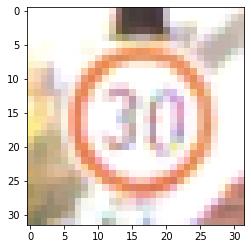

In [19]:
plt.imshow(X_test[400])

In [21]:
y_pred_prob[400]

array([4.6733391e-02, 1.2268255e-05, 1.4558573e-06, 7.5118120e-11,
       9.5325255e-01, 3.9328634e-09, 7.9730189e-13, 1.7592558e-15,
       2.2108762e-12, 4.2021089e-10, 4.2747307e-12, 1.8268523e-13,
       3.4352905e-07, 6.1918925e-12, 2.9033313e-13, 3.7268708e-09,
       7.8813518e-12, 2.3285360e-24, 1.9382411e-10, 1.7368261e-20,
       2.6243202e-11, 6.2950311e-19, 1.4367035e-19, 2.0369917e-12,
       5.1869519e-14, 9.3066390e-21, 1.7237067e-10, 5.2799993e-19,
       6.2144971e-14, 8.1677512e-12, 2.9727947e-24, 1.5176465e-19,
       2.5547164e-08, 6.5696689e-17, 1.5542854e-23, 6.6671950e-25,
       1.2486516e-22, 7.6245381e-21, 5.1307883e-25, 2.4495442e-18,
       6.5330608e-23, 3.2926456e-15, 1.4613389e-12], dtype=float32)

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [29]:
predict(model_trained, X_test, y_test)

0.8081632653061225

In [0]:
def train_and_predict(model):
  model_trained = train_model(X_train, y_train, model)
  return predict(model_trained, X_test, y_test)

In [32]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                    Flatten(),
                     
                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                    Dense(num_classes, activation='softmax'), #na koncu l.neuronów = num_classes
])


train_and_predict( get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 4.6432 - accuracy: 0.3404 - val_loss: 0.9006 - val_accuracy: 0.7565
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.8594 - accuracy: 0.7486 - val_loss: 0.2835 - val_accuracy: 0.9240
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4751 - accuracy: 0.8598 - val_loss: 0.1332 - val_accuracy: 0.9688
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3195 - accuracy: 0.9049 - val_loss: 0.0738 - val_accuracy: 0.9800
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2467 - accuracy: 0.9278 - val_loss: 0.0699 - val_accuracy: 0.9844


0.9192743764172335

In [33]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     MaxPool2D(),
                     Dropout(0.3),

                    Flatten(),
                     
                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                    Dense(num_classes, activation='softmax'), #na koncu l.neuronów = num_classes
])


train_and_predict( get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.1245 - accuracy: 0.5063 - val_loss: 0.5078 - val_accuracy: 0.8999
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.6005 - accuracy: 0.8215 - val_loss: 0.1598 - val_accuracy: 0.9651
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3357 - accuracy: 0.8993 - val_loss: 0.0727 - val_accuracy: 0.9857
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2253 - accuracy: 0.9324 - val_loss: 0.0474 - val_accuracy: 0.9879
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1599 - accuracy: 0.9516 - val_loss: 0.0374 - val_accuracy: 0.9921


0.972108843537415

In [35]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
                     Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                     MaxPool2D(),
                     Dropout(0.3),

                     Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                     Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                     MaxPool2D(),
                     Dropout(0.3),

                    Flatten(),
                     
                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                     Dense(1024, activation='relu'),
                     Dropout(0.3),

                    Dense(num_classes, activation='softmax'), #na koncu l.neuronów = num_classes
])


train_and_predict( get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.5637 - accuracy: 0.2972 - val_loss: 0.8685 - val_accuracy: 0.7345
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.7229 - accuracy: 0.7703 - val_loss: 0.1811 - val_accuracy: 0.9518
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.3263 - accuracy: 0.8999 - val_loss: 0.0718 - val_accuracy: 0.9786
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.2160 - accuracy: 0.9358 - val_loss: 0.0608 - val_accuracy: 0.9834
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1664 - accuracy: 0.9522 - val_loss: 0.0346 - val_accuracy: 0.9900


0.9727891156462585

In [36]:
X_train[0].shape

(32, 32, 3)

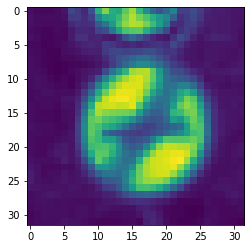

In [37]:
plt.imshow(color.rgb2gray( X_train[0]))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [44]:
model = get_cnn_v4((32, 32, 1), num_classes)
model_trained = train_model(X_train_gray, y_train, model, params_fit={} )
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.5535 - accuracy: 0.2852 - val_loss: 0.8583 - val_accuracy: 0.7542
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 0.6107 - accuracy: 0.8041 - val_loss: 0.2008 - val_accuracy: 0.9339
Epoch 3/5
272/272 [==============================] - 4s 16ms/step - loss: 0.3010 - accuracy: 0.9043 - val_loss: 0.0934 - val_accuracy: 0.9718
Epoch 4/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1999 - accuracy: 0.9368 - val_loss: 0.0800 - val_accuracy: 0.9766
Epoch 5/5
272/272 [==============================] - 4s 16ms/step - loss: 0.1462 - accuracy: 0.9541 - val_loss: 0.0418 - val_accuracy: 0.9872


0.963265306122449

<BarContainer object of 43 artists>

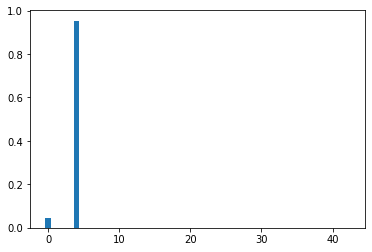

In [25]:
plt.bar(range(43), y_pred_prob[400])